## Load libraries and import data

In [6]:
from load_data import load_data
from get_latent import pca, vanilla_nnmf, sparse_nnmf
from cluster import cluster, plot_umap, evaluate_clustering
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
atac = load_data()

/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Added `interval` annotation for features from ./data/filtered_feature_bc_matrix.h5


/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/mudata/_core/mudata.py:479: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


Added peak annotation from ./data/atac_peak_annotation.tsv to .uns['atac']['peak_annotation']
Added gene names to peak annotation in .uns['atac']['peak_annotation']
Located fragments file: ./data/atac_fragments.tsv.gz


[W::hts_idx_load3] The index file is older than the data file: ./data/atac_fragments.tsv.gz.tbi


Number of highly variable regions:  5000


In [3]:
atac

View of AnnData object with n_obs × n_vars = 10032 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'celltype', 'pass_rnaQC', 'pass_accQC', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'atac', 'files', 'log1p', 'hvg'
    layers: 'counts'

In [8]:
results = {}

## Baseline Method 1: PCA
For all methods, use 2000 most highly variable regions and 100 latent dimensions for fair comparison

Number of clusters detected: 11, expected: 16
New resolution: 0.55
Number of clusters detected: 11, expected: 16
New resolution: 0.6050000000000001
Number of clusters detected: 11, expected: 16
New resolution: 0.6655000000000002
Number of clusters detected: 12, expected: 16
New resolution: 0.7320500000000003
Number of clusters detected: 13, expected: 16
New resolution: 0.8052550000000004
Number of clusters detected: 13, expected: 16
New resolution: 0.8857805000000005
Number of clusters detected: 13, expected: 16
New resolution: 0.9743585500000007
Number of clusters detected: 13, expected: 16
New resolution: 1.0717944050000008
Number of clusters detected: 15, expected: 16
New resolution: 1.178973845500001
Number of clusters detected: 15, expected: 16
New resolution: 1.2968712300500012
Number of clusters detected: 15, expected: 16
New resolution: 1.4265583530550014
Number of clusters detected: 15, expected: 16
New resolution: 1.5692141883605017
Number of clusters detected: 18, expected: 

/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


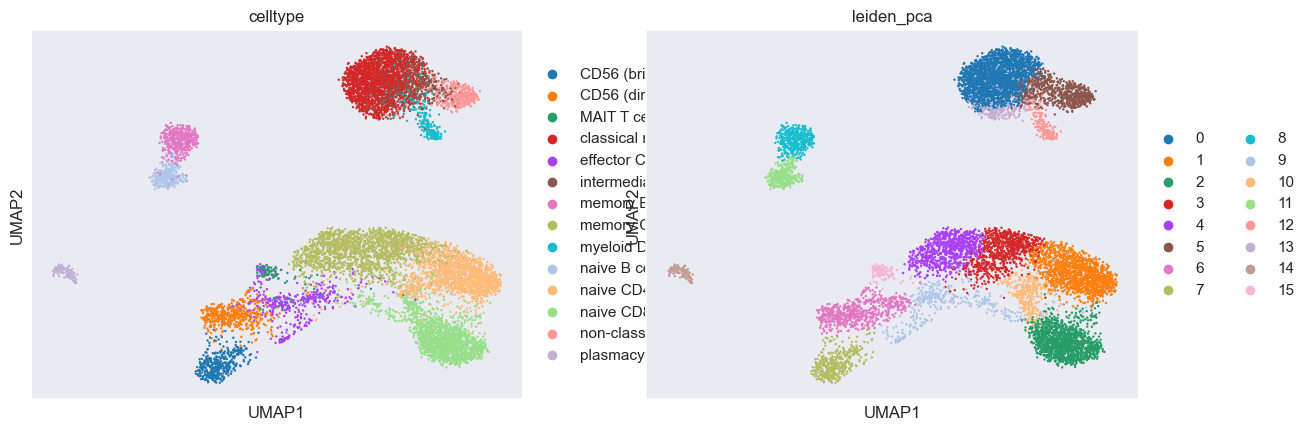

ARI: 0.6865785040174638, NMI: 0.780124132186024


In [12]:
atac = pca(atac, n_comps = 100)
atac = cluster(atac, 'pca', num_clusters = 16)
plot_umap(atac, latent_name = 'pca', keys = ['celltype', 'leiden_pca'],)
ari, nmi = evaluate_clustering(atac, 'leiden_pca')
results['pca'] = {'ari': ari, 'nmi': nmi}


## Vanilla Non-Negative Matrix Factorization

Iteration 1, Relative Error: 0.991498
Iteration 2, Relative Error: 0.960255
Iteration 3, Relative Error: 0.949930
Iteration 4, Relative Error: 0.946879
Iteration 5, Relative Error: 0.945720
Iteration 6, Relative Error: 0.944953
Iteration 7, Relative Error: 0.944370
Iteration 8, Relative Error: 0.943798
Iteration 9, Relative Error: 0.943359
Iteration 10, Relative Error: 0.943097
Iteration 11, Relative Error: 0.942945
Iteration 12, Relative Error: 0.942840
Iteration 13, Relative Error: 0.942751
Iteration 14, Relative Error: 0.942668
Iteration 15, Relative Error: 0.942576
Iteration 16, Relative Error: 0.942472
Iteration 17, Relative Error: 0.942370
Iteration 18, Relative Error: 0.942263
Iteration 19, Relative Error: 0.942150
Iteration 20, Relative Error: 0.942060
Number of clusters detected: 13, expected: 10
New resolution: 0.45
Number of clusters detected: 13, expected: 10
New resolution: 0.405
Number of clusters detected: 12, expected: 10
New resolution: 0.36450000000000005
Number of cl

/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


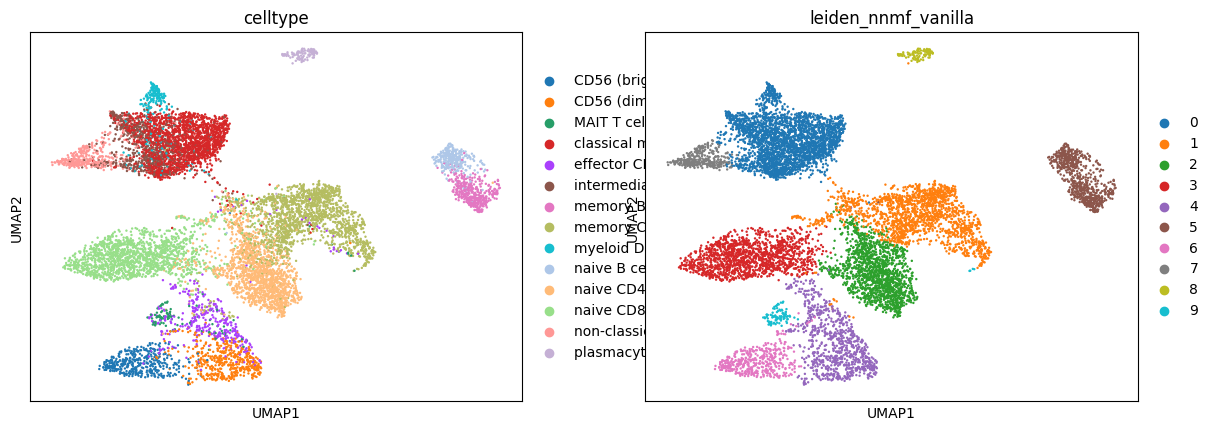

ARI: 0.6892965524152804, NMI: 0.7773782236394742


In [9]:
atac = vanilla_nnmf(atac,n_comps = 100, k_max = 20)
atac = cluster(atac, 'nnmf_vanilla')
plot_umap(atac, latent_name = 'nnmf_vanilla', keys = ['celltype', 'leiden_nnmf_vanilla'])
results['nnmf_vanilla'] = evaluate_clustering(atac, 'leiden_nnmf_vanilla')


In [7]:
atac

AnnData object with n_obs × n_vars = 10032 × 105707
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'celltype', 'pass_rnaQC', 'pass_accQC', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'n_counts', 'leiden_pca'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'atac', 'files', 'log1p', 'hvg', 'pca', 'leiden', 'umap', 'celltype_colors', 'leiden_pca_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'pca_distances', 'pca_connectivities'

## Sparse Non-Negative Matrix Factorization

Iteration 1: rel error = 1.001389
Iteration 2: rel error = 0.974529
Iteration 3: rel error = 0.962151
Iteration 4: rel error = 0.953899
Iteration 5: rel error = 0.948719
Iteration 6: rel error = 0.946218
Iteration 7: rel error = 0.944746
Iteration 8: rel error = 0.943960
Iteration 9: rel error = 0.943491
Iteration 10: rel error = 0.943214
Iteration 11: rel error = 0.943011
Iteration 12: rel error = 0.942845
Iteration 13: rel error = 0.942710
Iteration 14: rel error = 0.942597
Iteration 15: rel error = 0.942496
Iteration 16: rel error = 0.942398
Iteration 17: rel error = 0.942291
Iteration 18: rel error = 0.942171
Iteration 19: rel error = 0.942051
Iteration 20: rel error = 0.941949
Number of clusters detected: 12, expected: 10
New resolution: 0.45
Number of clusters detected: 13, expected: 10
New resolution: 0.405
Number of clusters detected: 12, expected: 10
New resolution: 0.36450000000000005
Number of clusters detected: 12, expected: 10
New resolution: 0.32805000000000006
Number of 

/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


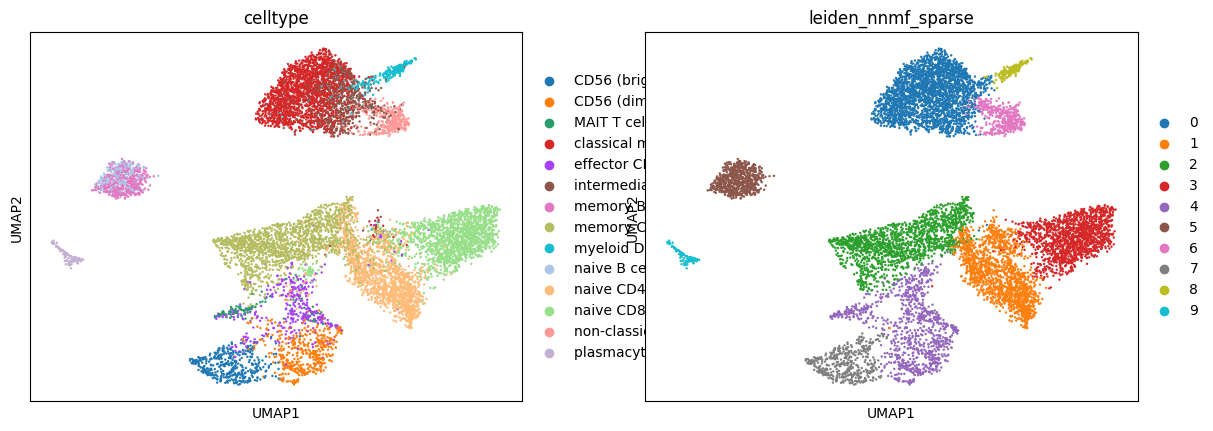

ARI: 0.7148151046228665, NMI: 0.7861986301898383


In [10]:
atac = sparse_nnmf(atac, n_comps = 100, k_max = 20)
atac = cluster(atac, 'nnmf_sparse')
plot_umap(atac, latent_name = 'nnmf_sparse', keys = ['celltype', 'leiden_nnmf_sparse'])
results['nnmf_sparse'] = evaluate_clustering(atac, 'leiden_nnmf_sparse')

## Plot Results

/var/folders/0k/wz8nbvps6g565rr_vdwxl5w80000gn/T/ipykernel_10360/1306403328.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


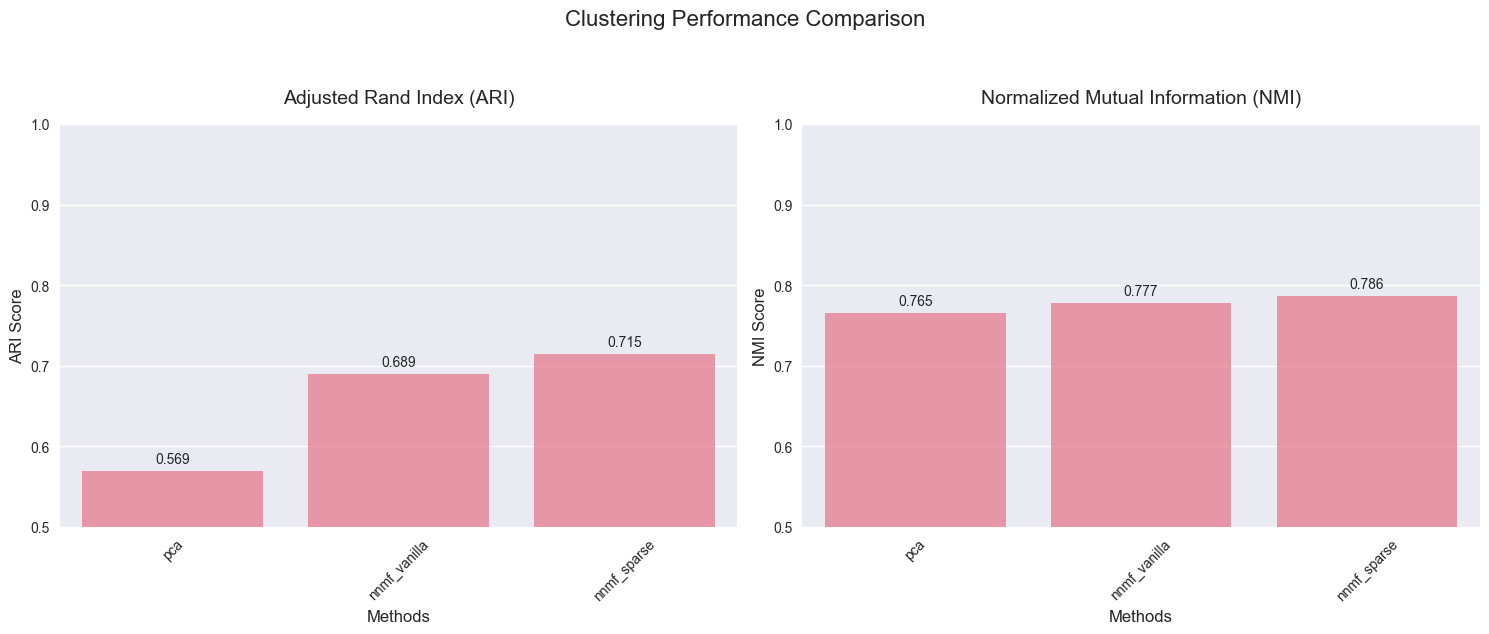

In [21]:

# Set the style
plt.style.use('seaborn')
sns.set_palette("husl")

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Prepare data for plotting
methods = list(results.keys())
ari_values = [results[m][0] for m in methods]
nmi_values = [results[m][1] for m in methods]

# Plot ARI
sns.barplot(x=methods, y=ari_values, ax=ax1, alpha=0.8)
ax1.set_title('Adjusted Rand Index (ARI)', fontsize=14, pad=15)
ax1.set_ylim(0.5, 1)
ax1.tick_params(axis='x', rotation=45)
ax1.set_xlabel('Methods', fontsize=12)
ax1.set_ylabel('ARI Score', fontsize=12)
# Add value labels on top of bars
for i, v in enumerate(ari_values):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=10)

# Plot NMI
sns.barplot(x=methods, y=nmi_values, ax=ax2, alpha=0.8)
ax2.set_title('Normalized Mutual Information (NMI)', fontsize=14, pad=15)
ax2.set_ylim(0.5, 1)
ax2.tick_params(axis='x', rotation=45)
ax2.set_xlabel('Methods', fontsize=12)
ax2.set_ylabel('NMI Score', fontsize=12)
# Add value labels on top of bars
for i, v in enumerate(nmi_values):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=10)

# Adjust layout and add a title
plt.suptitle('Clustering Performance Comparison', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


## Analysis of sparsity vs results:

In [4]:
results_sparsity = {}

In [ ]:
import pickle as pkl
with open('results.pkl', 'wb') as file:
    pkl.dump(results, file)
with open('results.pkl', 'wb') as file:
    pkl.dump(results, file)

#### Sparse NNMF with low regularization (beta = 0.01, eta = 0.01)

Iteration 1: rel error = 0.995252
Iteration 2: rel error = 0.973193
Iteration 3: rel error = 0.960691
Iteration 4: rel error = 0.951692
Iteration 5: rel error = 0.947134
Iteration 6: rel error = 0.944972
Iteration 7: rel error = 0.943997
Iteration 8: rel error = 0.943543
Iteration 9: rel error = 0.943197
Iteration 10: rel error = 0.942958
Iteration 11: rel error = 0.942798
Iteration 12: rel error = 0.942658
Iteration 13: rel error = 0.942506
Iteration 14: rel error = 0.942366
Iteration 15: rel error = 0.942272
Iteration 16: rel error = 0.942217
Iteration 17: rel error = 0.942182
Iteration 18: rel error = 0.942154
Iteration 19: rel error = 0.942127
Iteration 20: rel error = 0.942097
Number of clusters detected: 11, expected: 10
New resolution: 0.45
Number of clusters detected: 9, expected: 10
New resolution: 0.49500000000000005
Number of clusters detected: 11, expected: 10
New resolution: 0.44550000000000006
Number of clusters detected: 9, expected: 10
New resolution: 0.4900500000000001

/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


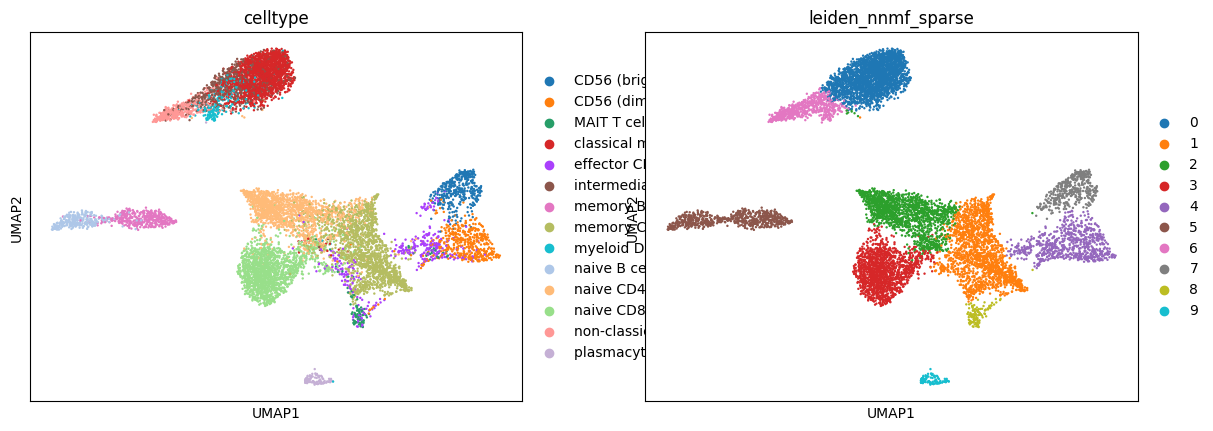

ARI: 0.7115081197043112, NMI: 0.7706079166016533


In [7]:
atac = sparse_nnmf(atac,n_comps = 100, beta = 0.01, eta = 0.01, k_max = 20)
atac = cluster(atac, 'nnmf_sparse')
plot_umap(atac, latent_name = 'nnmf_sparse', keys = ['celltype', 'leiden_nnmf_sparse'])
results_sparsity[0.01] = evaluate_clustering(atac, 'leiden_nnmf_sparse')

#### Sparse NNMF with moderate regularization (beta = 0.1, eta = 0.1)

Iteration 1: rel error = 0.999038
Iteration 2: rel error = 0.958209
Iteration 3: rel error = 0.945554
Iteration 4: rel error = 0.935901
Iteration 5: rel error = 0.928450
Iteration 6: rel error = 0.924405
Iteration 7: rel error = 0.922198
Iteration 8: rel error = 0.920897
Iteration 9: rel error = 0.920071
Iteration 10: rel error = 0.919558
Iteration 11: rel error = 0.919245
Iteration 12: rel error = 0.919027
Iteration 13: rel error = 0.918835
Iteration 14: rel error = 0.918634
Iteration 15: rel error = 0.918407
Iteration 16: rel error = 0.918222
Iteration 17: rel error = 0.918077
Iteration 18: rel error = 0.917913
Iteration 19: rel error = 0.917736
Iteration 20: rel error = 0.917595
Number of clusters detected: 8, expected: 10
New resolution: 0.55
Number of clusters detected: 11, expected: 10
New resolution: 0.49500000000000005
Number of clusters detected: 8, expected: 10
New resolution: 0.5445000000000001
Number of clusters detected: 12, expected: 10
New resolution: 0.4900500000000001


/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


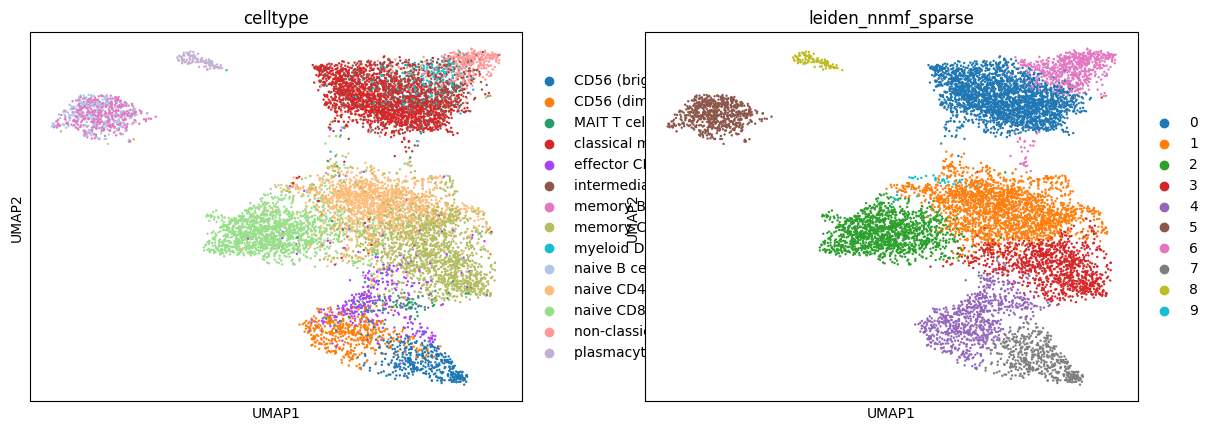

ARI: 0.5930526950409424, NMI: 0.6956013865077757


In [10]:
atac = sparse_nnmf(atac, n_comps = 100, beta = 0.1, eta = 0.1, k_max = 20)
atac = cluster(atac, 'nnmf_sparse')
plot_umap(atac, latent_name = 'nnmf_sparse', keys = ['celltype', 'leiden_nnmf_sparse'])
results_sparsity[0.1] = evaluate_clustering(atac, 'leiden_nnmf_sparse')

#### Sparse NNMF with high regularization (beta = 1, eta = 1)

Iteration 1: rel error = 1.003977
Iteration 2: rel error = 0.973593
Iteration 3: rel error = 0.959720
Iteration 4: rel error = 0.951252
Iteration 5: rel error = 0.946926
Iteration 6: rel error = 0.944972
Iteration 7: rel error = 0.943713
Iteration 8: rel error = 0.943214
Iteration 9: rel error = 0.942966
Iteration 10: rel error = 0.942813
Iteration 11: rel error = 0.942688
Iteration 12: rel error = 0.942551
Iteration 13: rel error = 0.942418
Iteration 14: rel error = 0.942320
Iteration 15: rel error = 0.942253
Iteration 16: rel error = 0.942205
Iteration 17: rel error = 0.942165
Iteration 18: rel error = 0.942130
Iteration 19: rel error = 0.942097
Iteration 20: rel error = 0.942063


/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


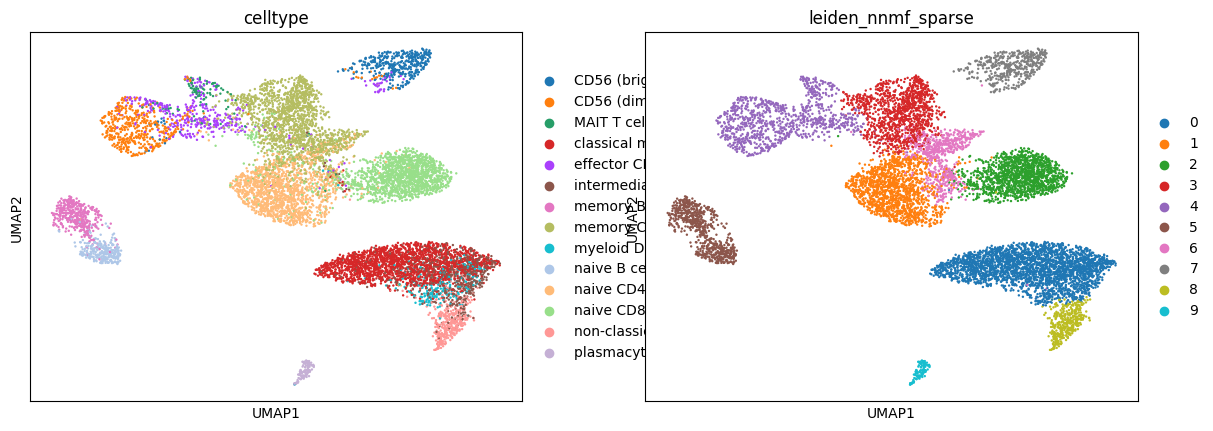

ARI: 0.6540384467126021, NMI: 0.7579895723662124


In [8]:
atac = sparse_nnmf(atac,n_comps = 100, beta = 1, eta = 1, k_max = 20)
atac = cluster(atac, 'nnmf_sparse')
plot_umap(atac, latent_name = 'nnmf_sparse', keys = ['celltype', 'leiden_nnmf_sparse'])
results_sparsity[1] = evaluate_clustering(atac, 'leiden_nnmf_sparse')

#### Sparse NNMF with very strong regularization (beta = 10, eta = 10)

Iteration 1: rel error = 1.004418
Iteration 2: rel error = 0.976769
Iteration 3: rel error = 0.966507
Iteration 4: rel error = 0.957486
Iteration 5: rel error = 0.950959
Iteration 6: rel error = 0.947267
Iteration 7: rel error = 0.945669
Iteration 8: rel error = 0.944738
Iteration 9: rel error = 0.944063
Iteration 10: rel error = 0.943695
Iteration 11: rel error = 0.943414
Iteration 12: rel error = 0.943179
Iteration 13: rel error = 0.943042
Iteration 14: rel error = 0.942960
Iteration 15: rel error = 0.942912
Iteration 16: rel error = 0.942883
Iteration 17: rel error = 0.942862
Iteration 18: rel error = 0.942846
Iteration 19: rel error = 0.942832
Iteration 20: rel error = 0.942819
Number of clusters detected: 8, expected: 10
New resolution: 0.55
Number of clusters detected: 8, expected: 10
New resolution: 0.6050000000000001
Number of clusters detected: 9, expected: 10
New resolution: 0.6655000000000002
Number of clusters detected: 9, expected: 10
New resolution: 0.7320500000000003


/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/anaconda3/envs/atac-seq/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


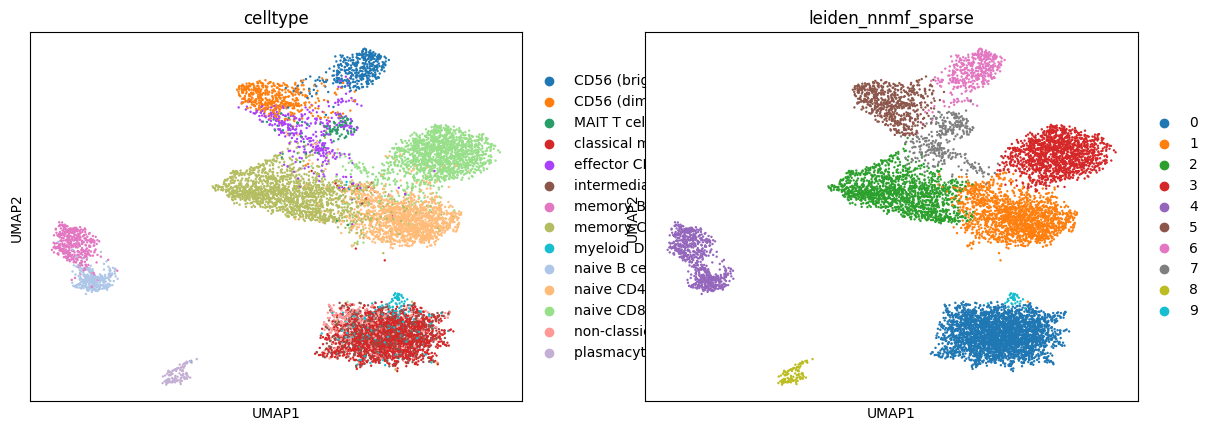

ARI: 0.6526366215922448, NMI: 0.7686358539492263


In [9]:
atac = sparse_nnmf(atac,n_comps = 100, beta = 10, eta = 10, k_max = 20)
atac = cluster(atac, 'nnmf_sparse')
plot_umap(atac, latent_name = 'nnmf_sparse', keys = ['celltype', 'leiden_nnmf_sparse'])
results_sparsity[10] = evaluate_clustering(atac, 'leiden_nnmf_sparse')

## Plot Results

/var/folders/0k/wz8nbvps6g565rr_vdwxl5w80000gn/T/ipykernel_33741/238420683.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


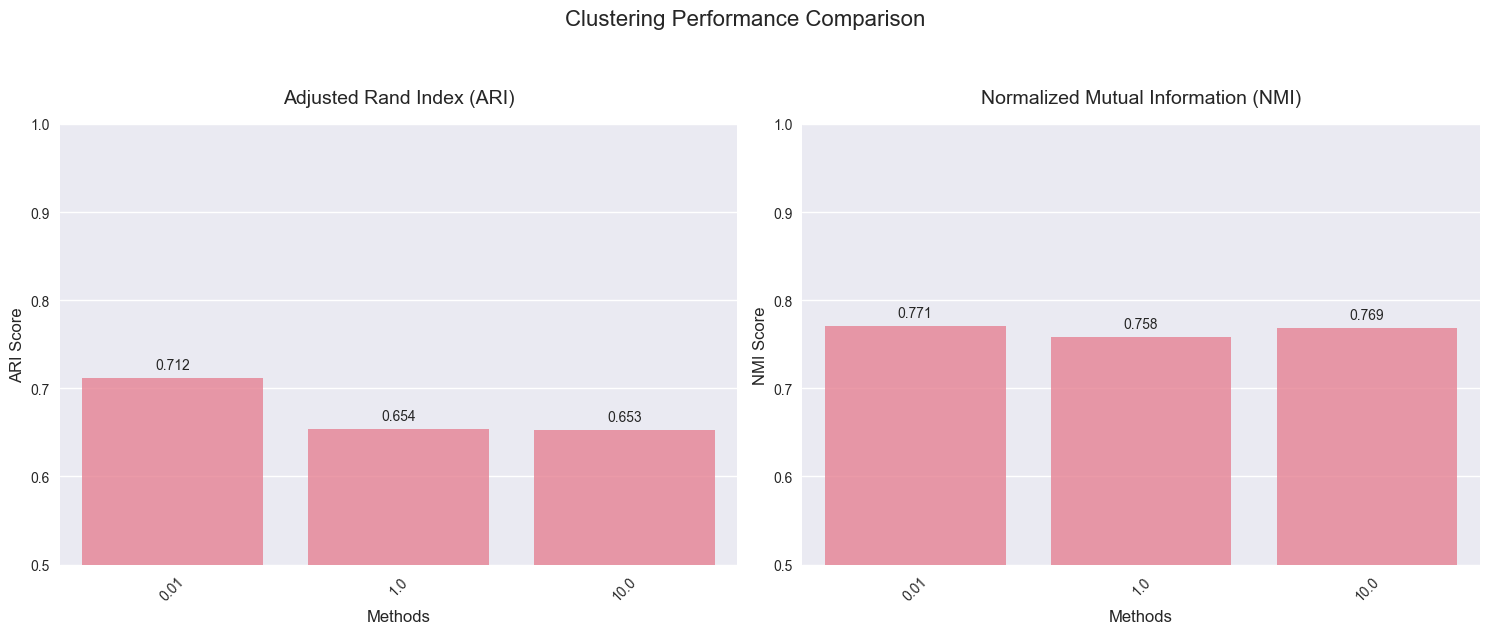

In [14]:

# Set the style
plt.style.use('seaborn')
sns.set_palette("husl")

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Prepare data for plotting
methods = list(results_sparsity.keys())
ari_values = [results_sparsity[m][0] for m in methods]
nmi_values = [results_sparsity[m][1] for m in methods]

# Plot ARI
sns.barplot(x=methods, y=ari_values, ax=ax1, alpha=0.8)
ax1.set_title('Adjusted Rand Index (ARI)', fontsize=14, pad=15)
ax1.set_ylim(0.5, 1)
ax1.tick_params(axis='x', rotation=45)
ax1.set_xlabel('Methods', fontsize=12)
ax1.set_ylabel('ARI Score', fontsize=12)
# Add value labels on top of bars
for i, v in enumerate(ari_values):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=10)

# Plot NMI
sns.barplot(x=methods, y=nmi_values, ax=ax2, alpha=0.8)
ax2.set_title('Normalized Mutual Information (NMI)', fontsize=14, pad=15)
ax2.set_ylim(0.5, 1)
ax2.tick_params(axis='x', rotation=45)
ax2.set_xlabel('Methods', fontsize=12)
ax2.set_ylabel('NMI Score', fontsize=12)
# Add value labels on top of bars
for i, v in enumerate(nmi_values):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=10)

# Adjust layout and add a title
plt.suptitle('Clustering Performance Comparison', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


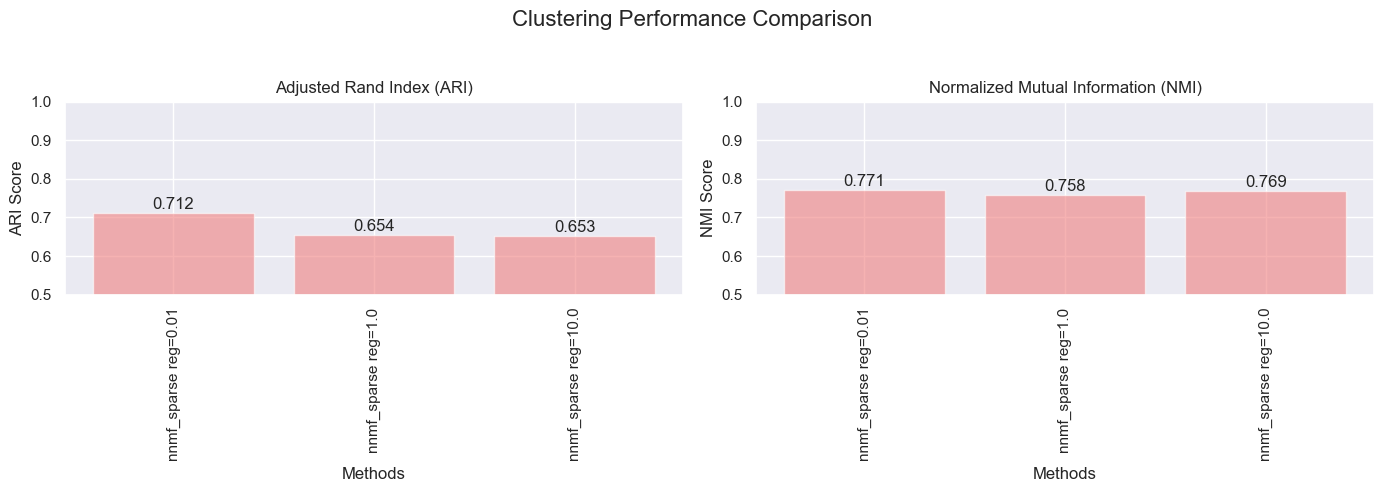

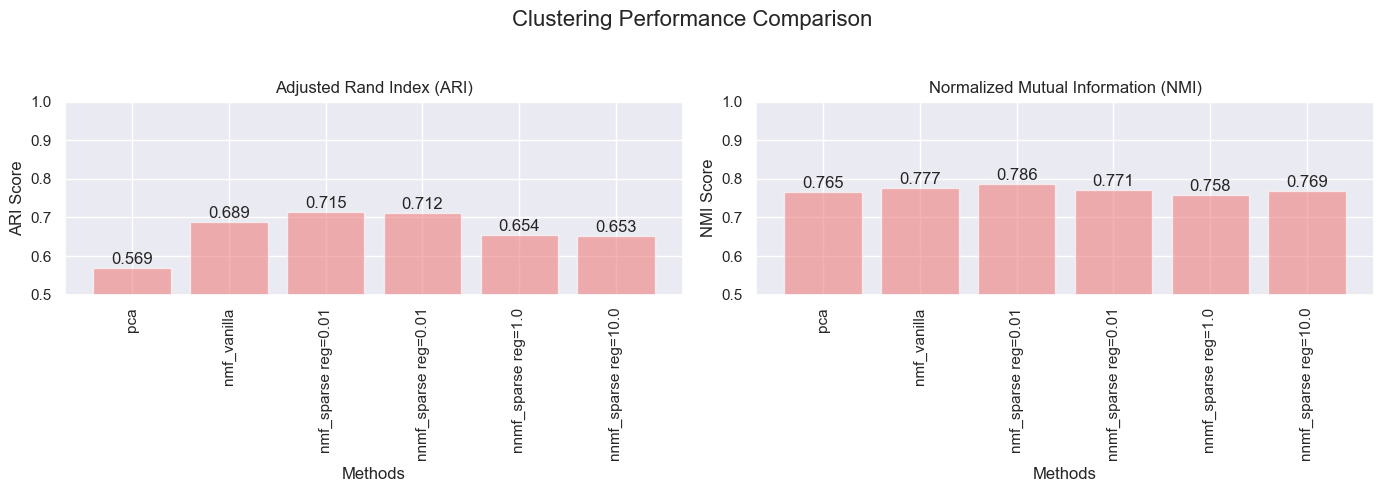

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set(style="darkgrid")

# Example 1: Varying a parameter (e.g., regularization weight)
methods_1 = ['nnmf_sparse reg=0.01', 'nnmf_sparse reg=1.0', 'nnmf_sparse reg=10.0']
ari_scores_1 = [0.712, 0.654, 0.653]
nmi_scores_1 = [0.771, 0.758, 0.769]

# Example 2: Comparing dimensionality reduction methods
methods_2 = ['pca', 'nmf_vanilla', 'nmf_sparse reg=0.01','nnmf_sparse reg=0.01', 'nnmf_sparse reg=1.0', 'nnmf_sparse reg=10.0']
ari_scores_2 = [0.569, 0.689, 0.715,0.712, 0.654, 0.653]
nmi_scores_2 = [0.765, 0.777, 0.786,0.771, 0.758, 0.769]

def plot_comparison(methods, ari_scores, nmi_scores, title_suffix=""):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle("Clustering Performance Comparison", fontsize=16)

    # ARI Plot
    axs[0].bar(methods, ari_scores, color='lightcoral', alpha=0.6)
    axs[0].set_ylim(0.5, 1.0)
    axs[0].set_title("Adjusted Rand Index (ARI)")
    axs[0].set_ylabel("ARI Score")
    axs[0].set_xlabel("Methods")
    for i, v in enumerate(ari_scores):
        axs[0].text(i, v + 0.01, f"{v:.3f}", ha='center')
    axs[0].tick_params(axis='x', rotation=90)  # For the ARI plot

    # NMI Plot
    axs[1].bar(methods, nmi_scores, color='lightcoral', alpha=0.6)
    axs[1].set_ylim(0.5, 1.0)
    axs[1].set_title("Normalized Mutual Information (NMI)")
    axs[1].set_ylabel("NMI Score")
    axs[1].set_xlabel("Methods")
    for i, v in enumerate(nmi_scores):
        axs[1].text(i, v + 0.01, f"{v:.3f}", ha='center')
    axs[1].tick_params(axis='x', rotation=90)  # For the NMI plot
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# First plot
plot_comparison(methods_1, ari_scores_1, nmi_scores_1)

# Second plot
plot_comparison(methods_2, ari_scores_2, nmi_scores_2)
